#  `representative_elementary_volume` 

Calculates the porosity of an image as a function subdomain size. This method works with extracting a specified number of subdomains of random size, then finding the porosity of those subdomains.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
inspect.signature(ps.metrics.representative_elementary_volume)

<Signature (im, npoints=1000)>

## `im`
The input binary image of the porous material with void space voxels labeled with 1(True) and solid phase labeled with 0(False).

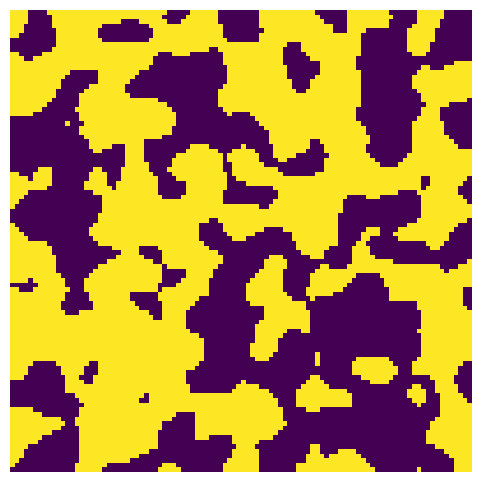

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[100,100, 100])
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(im[:,:,6], origin='lower', interpolation='none')
ax.axis(False);

The `representative_elementary_volume` returns a custom object containing the `volume` and `porosity` data. We can then plot the data to find the representative elementary volume (REV) of the porous material. REV can be found as the volume of a subdomain where any larger subdomain will have almost similar porosity values. In other words, in the following plot the point where the variation of porosity vs volume becomes a plateau.

  0%|          | 0/995 [00:00<?, ?it/s]

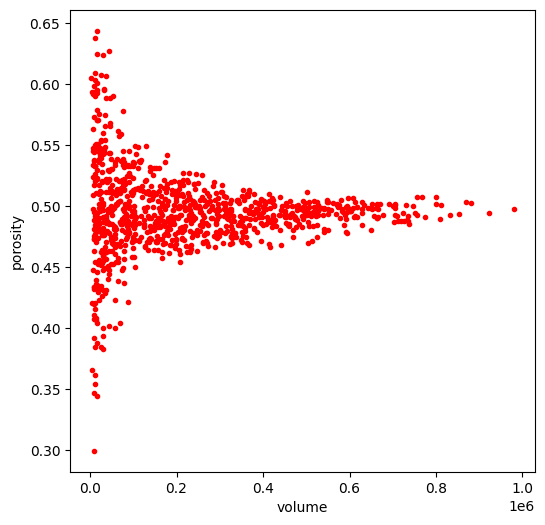

In [3]:
profile = ps.metrics.representative_elementary_volume(im=im)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(profile.volume, profile.porosity, 'r.')
ax.set_xlabel("volume")
ax.set_ylabel("porosity");

## `npoints`

By default the method uses 1000 randomly located and sized boxes to sample as subdomains. Let's try a higher number to increase the number of samples:

  0%|          | 0/1988 [00:00<?, ?it/s]

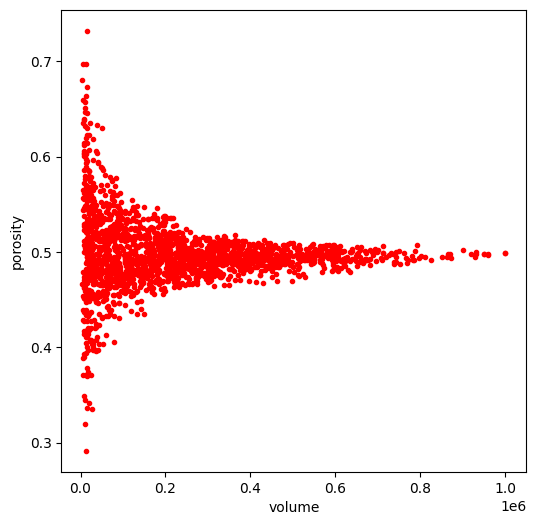

In [4]:
profile = ps.metrics.representative_elementary_volume(im=im, npoints=2000)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(profile.volume, profile.porosity, 'r.')
ax.set_xlabel("volume")
ax.set_ylabel("porosity");